In [1]:
pip install xgboost ipykernel

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV


C:\Users\20231776\.conda\envs\GA2_Geopandas_Spec\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data_frame = pd.read_csv("reshaped_burglary_data.csv")
data_frame.head()

,LSOA Code,LSOA Name,Borough,WardName,Latitude,Longitude,WardCode,Avg burglaries per month,Population Density,Income_london_rank,...,edu_london_rank_norm,health_london_rank_norm,barriers_london_rank_norm,livingEnv_london_rank_norm,imd_score_no_crime,imd_no_crime_rank,NearestStopDistance,Burglaries,Year,Month
0,E01000006,Barking and Dagenham 016A,E09000002,Northbury,51.538218,0.088862,E05014066,0.859873,12585.3,14023.0,...,0.494677,0.356266,0.897807,0.631790,0.512024,2402.0,463.397087,1,2019,3
1,E01000007,Barking and Dagenham 015A,E09000002,Northbury,51.540119,0.080570,E05014066,0.585987,14540.0,6261.0,...,0.397083,0.519706,0.970211,0.613325,0.664287,1296.0,53.834770,0,2019,3
2,E01000008,Barking and Dagenham 015B,E09000002,Northbury,51.540108,0.072566,E05014066,0.433121,9271.7,3382.0,...,0.718641,0.648763,0.902358,0.699591,0.793803,268.0,150.298306,0,2019,3
3,E01000009,Barking and Dagenham 016B,E09000002,Northbury,51.541333,0.084145,E05014066,0.719745,14104.8,7506.0,...,0.517002,0.733314,0.944353,0.667059,0.710090,894.0,46.558569,0,2019,3
4,E01000011,Barking and Dagenham 016C,E09000002,Northbury,51.542615,0.081852,E05014066,0.630573,18549.6,9033.0,...,0.665247,0.463908,0.983864,0.850748,0.665366,1289.0,71.825807,1,2019,3


In [4]:
target_column = 'Burglaries' 

In [5]:
y = data_frame[[target_column]]


X = data_frame.drop(columns=[
    target_column,
'LSOA Code', 'LSOA Name','Borough', 'WardName', 'WardCode', "imd_score_no_crime", "imd_no_crime_rank",
"Income_london_decile", "employment_london_decile",	"barriers_london_decile",	"livingEnv_london_decile",	"health_london_decile",	"edu_london_decile",	"Income_london_rank_norm",	"employment_london_rank_norm",	"edu_london_rank_norm",	"health_london_rank_norm",	"barriers_london_rank_norm",	"livingEnv_london_rank_norm",
'Latitude', 'Longitude', 'Avg burglaries per month'
], errors='ignore')
y

,Burglaries
0,1
1,0
2,0
3,0
4,1
...,...
852943,3
852944,1
852945,0
852946,0


In [6]:
# train_mask1 = (data_frame['Year'] >= 2010) & (data_frame['Year'] <= 2017)
# test_mask1 = (data_frame['Year'] >= 2018) & (data_frame['Year'] <= 2020)

# train_mask2 = (data_frame["Year"] >= 2021) & (data_frame ["Year"] <= 2023)
# test_mask2 = (data_frame[ 'Year'] >= 2024) & (data_frame['Year'] <= 2025)

# X_train_1 = X[train_mask1]; y_train_1 = y[train_mask1]
# X_train_2 = X[train_mask2]; y_train_2 = y[train_mask2]

# X_test_1 = X[test_mask1]; y_test_1 = y[test_mask1]
# X_test_2 = X[test_mask2]; y_test_2 = y[test_mask2]

# X_train = pd.concat([X_train_1, X_train_2], axis=0).reset_index(drop=True)
# y_train = pd.concat([y_train_1, y_train_2], axis=0).reset_index(drop=True)

# X_test = pd.concat ([X_test_1, X_test_2], axis=0).reset_index(drop=True)
# y_test = pd.concat([y_test_1, y_test_2], axis=0).reset_index(drop=True)

# y_test

In [7]:
X = X.select_dtypes(include=[np.number])
X = X.fillna(0)
X

,Population Density,Income_london_rank,employment_london_rank,barriers_london_rank,livingEnv_london_rank,health_london_rank,edu_london_rank,NearestStopDistance,Year,Month
0,12585.3,14023.0,21692.0,495.0,10629.0,21581.0,17511.0,463.397087,2019,3
1,14540.0,6261.0,11487.0,145.0,11162.0,16414.0,20536.0,53.834770,2019,3
2,9271.7,3382.0,6431.0,473.0,8672.0,12334.0,10569.0,150.298306,2019,3
3,14104.8,7506.0,11132.0,270.0,9611.0,9661.0,16819.0,46.558569,2019,3
4,18549.6,9033.0,16108.0,79.0,4309.0,18178.0,12224.0,71.825807,2019,3
...,...,...,...,...,...,...,...,...,...,...
852943,961.1,0.0,0.0,0.0,0.0,0.0,0.0,70.081764,2025,4
852944,13692.1,0.0,0.0,0.0,0.0,0.0,0.0,134.884814,2025,4
852945,11459.5,0.0,0.0,0.0,0.0,0.0,0.0,101.667377,2025,4
852946,10728.4,0.0,0.0,0.0,0.0,0.0,0.0,44.055813,2025,4


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
y_test

,Burglaries
491150,1
261515,1
397255,0
234706,3
115668,1
...,...
259091,0
35611,2
798456,0
785895,1


In [9]:
model = xgb.XGBRegressor(
    subsample = 0.5,
    reg_alpha = 0.1,
    reg_lambda = 5,
    n_estimators = 100,
    max_depth = 10,
    learning_rate = 0.03,
    gamma = 5,
    colsample_bytree = 0.9
    )
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.7967971283401979
MSE: 1.1475824618818462
R² Score: 0.08127947283626757


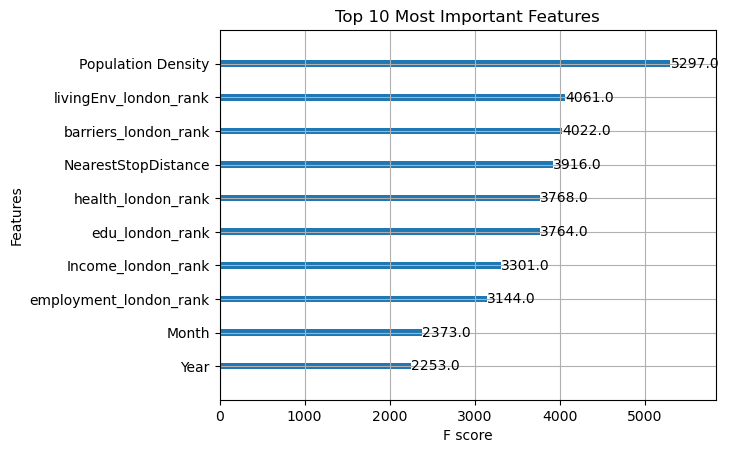

In [11]:
xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Most Important Features")
plt.show()

In [12]:
# xgb_reg = xgb.XGBRegressor(
#     objective='reg:squarederror',
#     random_state=42,
#     verbosity=0  
# )

# param_dist = {
#     'n_estimators': [50, 100, 400, 60],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7, 10, 8, 15],
#     'subsample': [0.5, 0.7, 0.9, 1.0],
#     'colsample_bytree': [0.5, 0.9, 1.0],
#     'gamma': [0, 0.5, 1, 5],
#     'reg_alpha': [0, 0.1, 0.5, 1.0],        
#     'reg_lambda': [1, 1.5, 2, 5]            
# }

# kf = KFold(n_splits=4, shuffle=True, random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=xgb_reg,
#     param_distributions=param_dist,
#     n_iter=200,
#     scoring='neg_mean_squared_error',
#     cv=kf,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train[target_column])

# print("Best parameters found:")
# for key, val in random_search.best_params_.items():
#     print(f"  • {key}: {val}")

# for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_train)):
#     print(f"\nFold {fold_idx}")
#     print("  TRAIN indices sample:", train_idx[:10], "... (total", len(train_idx), ")")
#     print("  VALID indices sample:", val_idx[:10], "... (total", len(val_idx), ")")

# cv_df = pd.DataFrame(random_search.cv_results_)
# display(cv_df[[
#     'params',
#     'split0_test_score',
#     'split1_test_score',
#     'split2_test_score',
#     'mean_test_score'
# ]].sort_values('mean_test_score', ascending=False).head())

# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print("\nEvaluation on the HOLDOUT set:")
# print(f"MAE:  {mean_absolute_error(y_test[target_column], y_pred):.4f}")
# print(f"MSE:  {mean_squared_error(y_test[target_column], y_pred):.4f}")
# # print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
# print(f"R²:   {r2_score(y_test[target_column], y_pred):.4f}")